In [ ]:
# Importing modules
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os

from keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
np.random.seed(1)

In [ ]:
# datagen = ImageDataGenerator(rotation_range=45,
#                              width_shift_range=0.2,
#                              height_shift_range=0.2,
#                              shear_range=0.2,
#                              zoom_range=0.2,
#                              horizontal_flip=True,
#                               fill_mode='reflect')


In [ ]:
my_images =tf.keras.preprocessing.image.load_img('/content/data/test/Ksiazka_49.jpg')
X = tf.keras.preprocessing.image.img_to_array(my_images)
X = X.reshape((1,) + X.shape)
i=0

for batch in datagen.flow(               X,
                                         batch_size=15,
                                         save_to_dir='/content/data/test',
                                         save_prefix='Ksiazka_1',
                                         save_format='jpg'):
  i +=1
  if i>10:
    break

my_images =tf.keras.preprocessing.image.load_img('/content/data/train/Ksiazka_17.jpg')
X = tf.keras.preprocessing.image.img_to_array(my_images)
X = X.reshape((1,) + X.shape)
i=0

for batch in datagen.flow(               X,
                                         batch_size=15,
                                         save_to_dir='/content/data/train',
                                         save_prefix='Ksiazka_1',
                                         save_format='jpg'):
  i +=1
  if i>10:
    break

In [ ]:
# Processing training data
# -> appending images in a list 'train_images'
# -> appending labels in a list 'train_labels'

train_images = []
train_labels = []
shape = (200,200)
train_path = '/content/data/train'




for filename in os.listdir('/content/data/train'):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(train_path,filename))

        # Spliting file names and storing the labels for image in list
        train_labels.append(filename.split('_')[0])

        # Resize all images to a specific shape
        img = cv2.resize(img,shape)

        train_images.append(img)

# Converting labels into One Hot encoded sparse matrix
train_labels = pd.get_dummies(train_labels).values

# Converting train_images to array
train_images = np.array(train_images)

# Splitting Training data into train and validation dataset
x_train,x_val,y_train,y_val = train_test_split(train_images,train_labels,random_state=1)

In [ ]:
# Processing testing data
# -> appending images in a list 'test_images'
# -> appending labels in a list 'test_labels'
# The test data contains labels as well also we are appending it to a list but we are'nt going to use it while training.

test_images = []
test_labels = []
shape = (200,200)
test_path = '/content/data/test'


for filename in os.listdir('/content/data/test'):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(test_path,filename))

        # Spliting file names and storing the labels for image in list
        test_labels.append(filename.split('_')[0])

        # Resize all images to a specific shape
        img = cv2.resize(img,shape)

        test_images.append(img)

# Converting test_images to array
test_images = np.array(test_images)

[0 1 0]


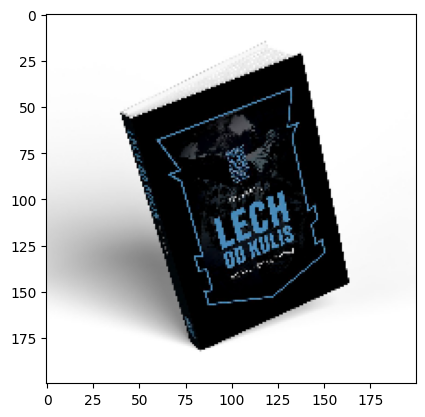

In [ ]:
# Visualizing Training data
print(train_labels[0])
plt.imshow(train_images[0])

[0 1 0]


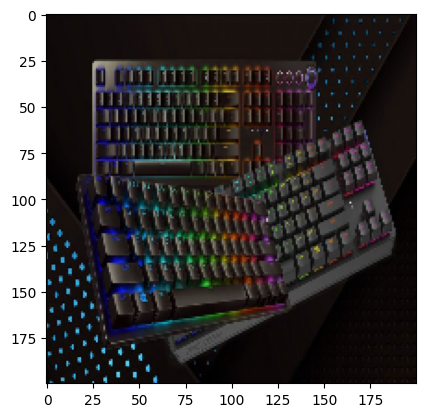

In [ ]:
# Visualizing Training data
print(train_labels[0])
plt.imshow(train_images[2])

In [ ]:
# Creating a Sequential model
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(200,200,3,)))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))

model.add(Flatten())

model.add(Dense(20,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(3,activation = 'softmax'))
#model.add(Flatten())
model.compile(
              loss='categorical_crossentropy',
              metrics=['acc'],
              optimizer='adam'
             )

In [ ]:
# #Second model
# model1= Sequential()
# model1.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(200,200,3,)))
# model1.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
# model1.add(MaxPool2D(2,2))
# model1.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
# model1.add(MaxPool2D(2,2))
# model1.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))

# model1.add(Flatten())

# model1.add(Dense(20,activation='relu'))
# model1.add(Dense(15,activation='relu'))
# model1.add(Dense(3,activation = 'softmax'))
# #model.add(Flatten())
# model1.compile(
#               loss='categorical_crossentropy',
#               metrics=['acc'],
#               optimizer='adam'
#              )

In [ ]:
# Model Summary
model.summary()
# model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 196, 196, 30)      8670      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 30)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 30)        8130      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 30)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 46, 46, 30)        8

In [ ]:
# Training the model
history = model.fit(x_train,y_train,epochs=50,batch_size=50,validation_data=(x_val,y_val))

Epoch 1/50
2/2 [==============================] - 17s 7s/step - loss: 2.5647 - acc: 0.2963 - val_loss: 1.8348 - val_acc: 0.3571
Epoch 2/50
2/2 [==============================] - 13s 6s/step - loss: 1.4808 - acc: 0.4568 - val_loss: 16.0774 - val_acc: 0.1071
Epoch 3/50
2/2 [==============================] - 14s 7s/step - loss: 10.0172 - acc: 0.2963 - val_loss: 0.9383 - val_acc: 0.5357
Epoch 4/50
2/2 [==============================] - 13s 7s/step - loss: 1.6251 - acc: 0.3086 - val_loss: 1.0893 - val_acc: 0.5357
Epoch 5/50
2/2 [==============================] - 13s 7s/step - loss: 1.1630 - acc: 0.3333 - val_loss: 1.0654 - val_acc: 0.6786
Epoch 6/50
2/2 [==============================] - 14s 7s/step - loss: 0.9889 - acc: 0.5432 - val_loss: 0.9159 - val_acc: 0.8214
Epoch 7/50
2/2 [==============================] - 13s 7s/step - loss: 0.8848 - acc: 0.6296 - val_loss: 0.9162 - val_acc: 0.4286
Epoch 8/50
2/2 [==============================] - 13s 6s/step - loss: 0.8507 - acc: 0.4938 - val_loss:

In [ ]:
# history1 = model1.fit(x_train,y_train,epochs=50,batch_size=50,validation_data=(x_val,y_val))

Epoch 1/50
3/3 [==============================] - 24s 7s/step - loss: 3.1982 - acc: 0.4046 - val_loss: 1.6277 - val_acc: 0.3409
Epoch 2/50
3/3 [==============================] - 21s 7s/step - loss: 1.7439 - acc: 0.4504 - val_loss: 1.2358 - val_acc: 0.1818
Epoch 3/50
3/3 [==============================] - 20s 7s/step - loss: 1.1841 - acc: 0.3282 - val_loss: 1.9092 - val_acc: 0.3409
Epoch 4/50
3/3 [==============================] - 22s 7s/step - loss: 1.8074 - acc: 0.4198 - val_loss: 1.5809 - val_acc: 0.2273
Epoch 5/50
3/3 [==============================] - 21s 7s/step - loss: 1.3879 - acc: 0.4351 - val_loss: 1.4850 - val_acc: 0.2727
Epoch 6/50
3/3 [==============================] - 27s 10s/step - loss: 1.0788 - acc: 0.5573 - val_loss: 1.4005 - val_acc: 0.2955
Epoch 7/50
3/3 [==============================] - 23s 7s/step - loss: 1.0366 - acc: 0.4962 - val_loss: 1.2940 - val_acc: 0.2500
Epoch 8/50
3/3 [==============================] - 22s 7s/step - loss: 1.0032 - acc: 0.5344 - val_loss: 

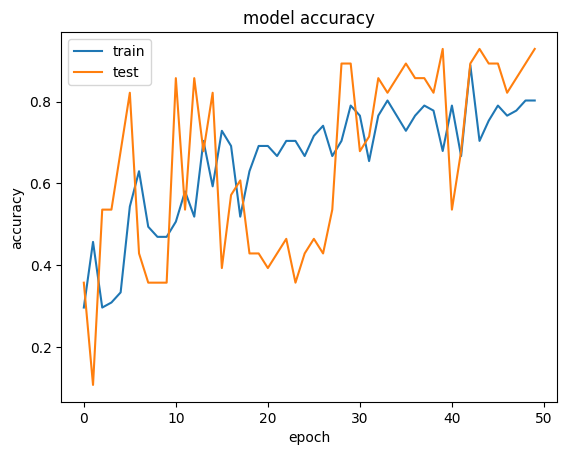

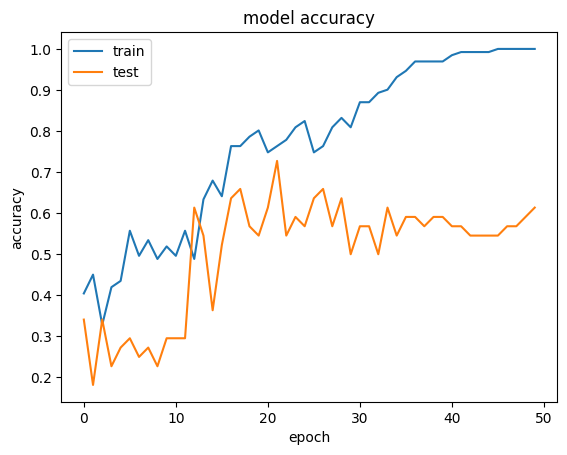

In [ ]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# plt.plot(history1.history['acc'])
# plt.plot(history1.history['val_acc'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

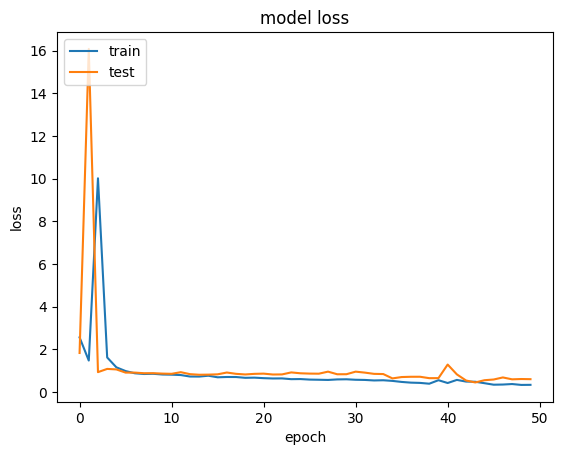

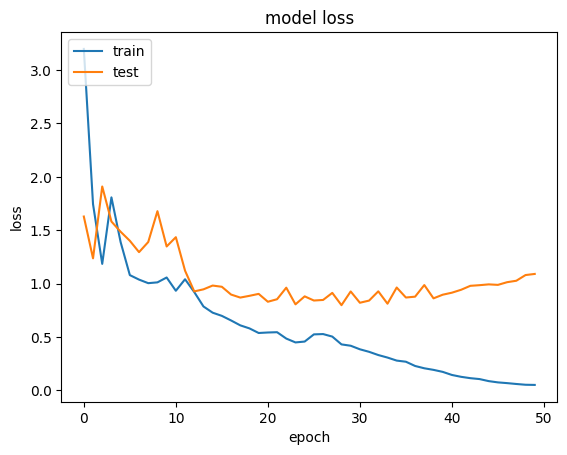

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# plt.plot(history1.history['loss'])
# plt.plot(history1.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

In [ ]:
# Evaluating model on validation data
evaluate = model.evaluate(x_val,y_val)
print(evaluate)

# # Evaluating model on validation data
# evaluate1 = model1.evaluate(x_val,y_val)
# print(evaluate1)

2/2 [==============================] - 1s 413ms/step - loss: 0.5394 - acc: 0.7727
[0.5394092798233032, 0.7727272510528564]
2/2 [==============================] - 2s 432ms/step - loss: 1.0897 - acc: 0.6136
[1.0897341966629028, 0.6136363744735718]


In [ ]:
# Testing predictions and the actual label
checkImage = test_images[1:2]
checklabel = test_labels[1:2]

predict = model.predict(np.array(checkImage))
# predict1 = model1.predict(np.array(checkImage))

output = { 0:'klawiatura',1:'ksiazka',2:'kubek'}

print("Actual :- ",checklabel)
print("Predicted :- ",output[np.argmax(predict)])
# print("Predicted :- ",output[np.argmax(predict1)])

1/1 [==============================] - 0s 55ms/step
Actual :-  ['Klawiatura']
Predicted :-  kubek
Predicted :-  kubek
